In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy import constants as const
from astropy.time import Time
from astropy.time import TimeDelta
from astropy.coordinates import SkyCoord
from astropy import units as u
import csv

plt.rcParams["xtick.major.size"] = 9
plt.rcParams["xtick.major.width"] = 1.5
plt.rcParams["ytick.major.size"] = 9
plt.rcParams["ytick.major.width"] = 1.5
plt.rcParams["font.size"] = 14

pi = np.pi
BIGG = const.G.value
MSUN = const.M_sun.value
MEARTH = const.M_earth.value
AU = const.au.value
OUMUAMUA_COORDS = [np.radians(279.804-360.), np.radians(33.997)]

THETA = np.radians(122.932)                    
ANGP = np.radians(192.859508)
DNGP = np.radians(27.128336)

In [2]:
LAT = np.radians(-30.-(14./60.)-(40.68/3600.))
LONG = np.radians(-70.-(44./60.)-(57.90/3600.))

INIT_TIMES = ['2021-01-01 00:00', '2021-01-15 00:00', \
              '2021-02-01 00:00', '2021-02-15 00:00', \
              '2021-03-01 00:00', '2021-03-15 00:00', \
              '2021-04-01 00:00', '2021-04-15 00:00', \
              '2021-05-01 00:00', '2021-05-15 00:00', \
              '2021-06-01 00:00', '2021-06-15 00:00', \
              '2021-07-01 00:00', '2021-07-15 00:00', \
              '2021-08-01 00:00', '2021-08-15 00:00', \
              '2021-09-01 00:00', '2021-09-15 00:00', \
              '2021-10-01 00:00', '2021-10-15 00:00', \
              '2021-11-01 00:00', '2021-11-15 00:00', \
              '2021-12-01 00:00', '2021-12-15 00:00']

# Read in velocity file

In [3]:
MAINPATH = 'distribution_function/'
vel = np.loadtxt(MAINPATH + 'vgal.txt')           # already galactic velocities, with respect to Sun             
                                                  # subtracting VSUN is unecessary
NSAMPLES = len(vel)

In [4]:
T1 = [[np.cos(THETA), np.sin(THETA), 0.], [np.sin(THETA), -np.cos(THETA), 0.], [0., 0., 1.]]    
T2 = [[-np.sin(DNGP), 0., np.cos(DNGP)], [0., 1., 0.], [np.cos(DNGP), 0., np.sin(DNGP)]]        
T3 = [[np.cos(ANGP), np.sin(ANGP), 0.], [-np.sin(ANGP), np.cos(ANGP), 0.], [0., 0., 1.]]

T = np.matmul(np.matmul(T1, T2), T3)                                                       
                                                                                           
def get_ra_dec(R):
    R = np.matmul(np.linalg.inv(T), R)
    mag = np.linalg.norm(R)
    dec = np.arcsin(R[2]/mag)
    if R[1]/mag > 0:
        ra = np.arccos(R[0]/(mag*np.cos(dec)))
    else:
        ra = 2*pi-np.arccos(R[0]/(mag*np.cos(dec)))
    if ra > pi:
        ra = ra - 2*pi
    return np.asarray([ra, dec])

pos = np.zeros((NSAMPLES, 2))
for i, v in enumerate(vel):
    pos[i] = get_ra_dec(-v) 

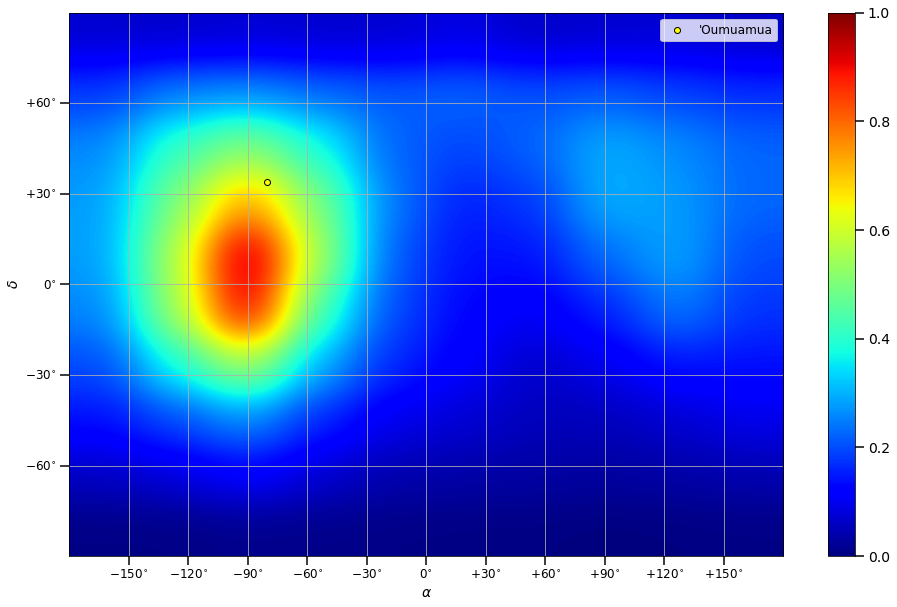

In [5]:
plt.figure(figsize=(16, 10))

H, xedges, yedges = np.histogram2d(pos[:, 0], pos[:, 1], bins=10)
plt.imshow(H.transpose()[::-1], extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]], interpolation='gaussian', aspect='auto', \
           cmap='jet')

plt.xlabel(r'$\alpha$')
plt.xticks([-pi, -5*pi/6, -2*pi/3, -pi/2, -pi/3, -pi/6, 0, pi/6, pi/3, pi/2, 2*pi/3, 5*pi/6, pi], [r'$-180^{\circ}$', \
        r'$-150^{\circ}$', r'$-120^{\circ}$', r'$-90^{\circ}$', r'$-60^{\circ}$', r'$-30^{\circ}$', r'$0^{\circ}$', \
        r'$+30^{\circ}$', r'$+60^{\circ}$', r'$+90^{\circ}$', r'$+120^{\circ}$', r'$+150^{\circ}$', r'$+180^{\circ}$'], \
          fontsize=12)

plt.ylabel(r'$\delta$')
plt.yticks([-pi/2, -pi/3, -pi/6, 0, pi/6, pi/3, pi/2], [r'$-90^{\circ}$', r'$-60^{\circ}$', r'$-30^{\circ}$', \
        r'$0^{\circ}$', r'$+30^{\circ}$', r'$+60^{\circ}$', r'$+90^{\circ}$'], fontsize=12)
plt.grid(True)

plt.scatter(OUMUAMUA_COORDS[0], OUMUAMUA_COORDS[1], c='yellow', edgecolor='k', label="'Oumuamua")
plt.legend(loc='upper right', fontsize=12)
cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap='jet'))

plt.show()

# Draw b and $\psi$

In [6]:
A = 0.                                                     
B = 5.

def sample_b_dist(N=NSAMPLES, a=0, b=5):                  
    P = np.random.uniform(size=N)
    return (P*(b**3-a**3) + a**3)**(1/3)

b = sample_b_dist(a=A, b=B)
psi = np.random.uniform(low=0, high=2*pi, size=NSAMPLES)

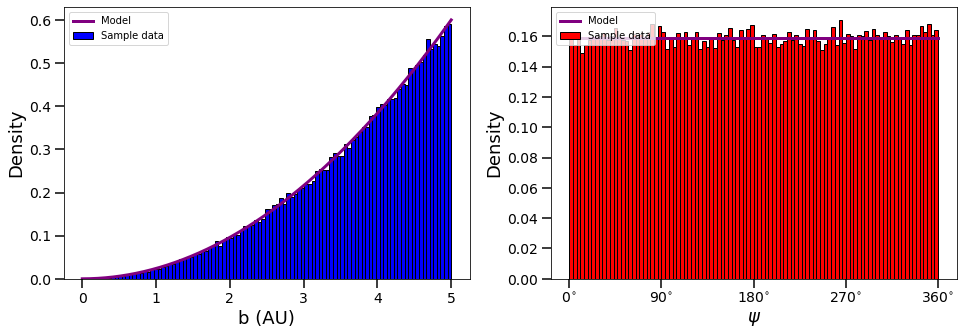

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
ax1 = axes[0]
ax1.hist(b, color='blue', edgecolor='k', bins=100, density=True, label='Sample data')
x = np.linspace(A, B, 1000)
ax1.plot(x, 3*x**2/(B**3-A**3), c='purple', lw=3, label='Model')                         
ax1.set_xlabel('b (AU)', fontsize=18)
ax1.set_ylabel('Density', fontsize=18)
ax1.legend(loc='upper left', fontsize=10)

ax2 = axes[1]
ax2.hist(psi, color='red', edgecolor='k', bins=100, density=True, label='Sample data')
ax2.plot(np.linspace(0, 2*pi, 1000), np.repeat([1/(2*pi)], 1000), c='purple', lw=3, label='Model')  
ax2.set_xlabel(r'$\psi$', fontsize=18)
ax2.set_xticks([0, pi/2, pi, 3*pi/2, 2*pi])
ax2.set_xticklabels([r'$0^{\circ}$', r'$90^{\circ}$', r'$180^{\circ}$', r'$270^{\circ}$', r'$360^{\circ}$'])
ax2.set_ylabel('Density', fontsize=18)
ax2.legend(loc='upper left', fontsize=10)

plt.savefig('figures/b_psi.pdf', bbox_inches='tight', dpi=250)
plt.show()

# Get initial R vectors

In [8]:
RSKY = 5. 
VESC = np.sqrt(2*BIGG*MSUN/(RSKY*AU))/1000

for i, v in enumerate(vel):
    vel[i] = v*np.sqrt(np.linalg.norm(v)**2 + \
                       VESC**2)/np.linalg.norm(v)

In [9]:
R = np.zeros((NSAMPLES, 3))
b_vec = np.zeros_like(R)
R_sky = np.zeros_like(R)

for i, v in enumerate(vel):
    R_sky[i] = -np.sqrt(RSKY**2-b[i]**2)*v/np.linalg.norm(v)
    phi = np.arctan(-(np.cos(psi[i])*v[0] + np.sin(psi[i])*v[1])/v[2])
    b_vec[i] = np.array([b[i]*np.cos(phi)*np.cos(psi[i]), b[i]*np.cos(phi)*np.sin(psi[i]), \
                         b[i]*np.sin(phi)])
    R[i] = R_sky[i] + b_vec[i]

# Run simulations using REBOUND

In [10]:
import rebound

NTIMES = 100
INTEGRATION_TIME = 3.*365.*24.*60.*60.

def plot_orbit(R, v):
    sim = rebound.Simulation('simulations/ss' + \
                str(np.random.randint(0, len(INIT_TIMES))) + '.bin')
    sim.add(x=R[0], y=R[1], z=R[2], vx=v[0]*1000./AU, \
            vy=v[1]*1000./AU, vz=v[2]*1000./AU)
    rebound.OrbitPlot(sim, periastron=True, color=True, \
            unitlabel='[AU]', slices=0.5, orbit_type='solid')
    
def get_apparent_magnitude(dBS, dBO, dOS, H=22.4):
    theta = np.arccos((dBO**2 + dBS**2 - dOS**2)/(2*dBO*dBS))
    phase = (2/3)*((1-theta/pi)*np.cos(theta) + np.sin(theta)/pi)
    
    m = H + 2.5*np.log10((dBS**2*dBO**2)/(phase*dOS**4))
    return m

def integrate(R, v):
    simid = np.random.randint(0, len(INIT_TIMES))
    sim = rebound.Simulation('simulations/ss' + \
                str(simid) + '.bin')
    sim.add(x=R[0], y=R[1], z=R[2], vx=v[0]*1000./AU, \
            vy=v[1]*1000./AU, vz=v[2]*1000./AU)
    
    ps = sim.particles
    times = np.linspace(0, INTEGRATION_TIME, NTIMES)
    distances = np.zeros_like(times)
    mag = np.zeros_like(times)
    
    rad = np.zeros((NTIMES, 3))
    vel = np.zeros_like(rad)
    
    pos_eq = np.zeros((NTIMES, 2))
    solar_pos_eq = np.zeros_like(pos_eq)
    
    orbit = ps[-1].calculate_orbit(primary=ps[0])
    
    for i, t in enumerate(times):
        sim.integrate(t)
        
        rBS = ps[2] - ps[0]
        rBO = ps[2] - ps[1]
        rOS = ps[1] - ps[0]
        
        dBS = np.sqrt(rBS.x**2 + rBS.y**2 + rBS.z**2)
        dBO = np.sqrt(rBO.x**2 + rBO.y**2 + rBO.z**2)
        dOS = np.sqrt(rOS.x**2 + rOS.y**2 + rOS.z**2)
        
        distances[i] = dBO
        rad[i] = np.array([ps[-1].x, ps[-1].y, ps[-1].z])
        vel[i] = np.array([ps[-1].vx, ps[-1].vy, ps[-1].vz])
        mag[i] = get_apparent_magnitude(dBS, dBO, dOS)
        pos_eq[i] = get_ra_dec(rad[i])
        solar_pos_eq[i] = get_ra_dec([-rOS.x, -rOS.y, -rOS.z])
        
    orbit_data = {}
    orbit_data['times'] = times
    orbit_data['dist'] = distances
    orbit_data['rad'] = rad
    orbit_data['vel'] = vel
    orbit_data['mag'] = mag
    orbit_data['pos_eq'] = pos_eq
    orbit_data['solar_pos_eq'] = solar_pos_eq
    
    orbit_data['a'] = orbit.a
    orbit_data['e'] = orbit.e
    orbit_data['inc'] = orbit.inc
    orbit_data['Omega'] = orbit.Omega
    orbit_data['omega'] = orbit.omega
    orbit_data['f'] = orbit.f
    orbit_data['simid'] = simid
    
    return orbit_data 

In [11]:
orbits = {}

orbits['a'] = np.zeros(NSAMPLES)
orbits['e'] = np.zeros_like(orbits['a'])
orbits['inc'] = np.zeros_like(orbits['a'])
orbits['Omega'] = np.zeros_like(orbits['a'])
orbits['omega'] = np.zeros_like(orbits['a'])
orbits['f'] = np.zeros_like(orbits['a'])
orbits['b'] = np.zeros_like(orbits['a'])
orbits['id'] = np.zeros_like(orbits['a'])
orbits['simid'] = np.zeros_like(orbits['a'])

orbits['dist'] = np.zeros((NSAMPLES, NTIMES))
orbits['mag'] = np.zeros_like(orbits['dist'])
orbits['times'] = np.zeros_like(orbits['dist'])

orbits['rad'] = np.zeros((NSAMPLES, NTIMES, 3))
orbits['vel'] = np.zeros_like(orbits['rad'])

orbits['pos_eq'] = np.zeros((NSAMPLES, NTIMES, 2))
orbits['solar_pos_eq'] = np.zeros_like(orbits['pos_eq'])

for i in range(NSAMPLES):
    if i % 2500 == 0:
        print(i)
    o = integrate(R[i], vel[i])
    
    orbits['a'][i] = o['a']
    orbits['e'][i] = o['e']
    orbits['inc'][i] = o['inc']
    orbits['Omega'][i] = o['Omega']
    orbits['omega'][i] = o['omega']
    orbits['f'][i] = o['f']
    orbits['b'][i] = b[i]
    orbits['id'][i] = i+1
    orbits['simid'][i] = o['simid']
    
    orbits['dist'][i] = o['dist']
    orbits['mag'][i] = o['mag']
    orbits['rad'][i] = o['rad']
    orbits['vel'][i] = o['vel']
    orbits['pos_eq'][i] = o['pos_eq']
    orbits['solar_pos_eq'][i] = o['solar_pos_eq']
    orbits['times'][i] = o['times']

0
2500
5000
7500
10000
12500
15000
17500
20000
22500
25000
27500
30000
32500
35000
37500
40000
42500
45000
47500
50000
52500
55000
57500
60000
62500
65000
67500
70000
72500
75000
77500
80000
82500
85000
87500
90000
92500
95000
97500


In [12]:
sim_init_times = []
for i in range(NSAMPLES):
    sim_init_times.append(INIT_TIMES[int(orbits['simid'][i])])
         
t0 = Time(sim_init_times, scale='utc', location=(LAT, LONG))

In [13]:
orbits['sid_time'] = np.zeros_like(orbits['times'])
orbits['datetime'] = np.zeros((NSAMPLES, NTIMES, 3))
for i in range(NTIMES):
    dt = TimeDelta(orbits['times'][:, i], format='sec')
    t1 = t0 + dt
    orbits['sid_time'][:, i] = t1.sidereal_time('apparent').to(u.radian).value
    orbits['datetime'][:, i, 0] = t1.ymdhms.year
    orbits['datetime'][:, i, 1] = t1.ymdhms.month
    orbits['datetime'][:, i, 2] = t1.ymdhms.day

In [14]:
def get_az_alt(pos, sid_time):
    alt = np.arcsin(np.sin(pos[:, 1])*np.sin(LAT) + \
                np.cos(pos[:, 1])*np.cos(LAT)*np.cos(sid_time-pos[:, 0]))
    az = np.arcsin(-np.sin(sid_time-pos[:, 0])*np.cos(pos[:, 1])/np.cos(alt))
    return np.column_stack((az, alt))

orbits['pos_horiz'] = np.zeros_like(orbits['pos_eq'])
orbits['solar_pos_horiz'] = np.zeros_like(orbits['solar_pos_eq'])
for i, p in enumerate(orbits['pos_eq']):
    orbits['pos_horiz'][i] = get_az_alt(p, orbits['sid_time'][i])
    orbits['solar_pos_horiz'][i] = get_az_alt(orbits['solar_pos_eq'][i], orbits['sid_time'][i])

In [15]:
det = np.min(orbits['mag'], axis=1) <= 24.
ndet = len(det[det==True])
print('# detectable particles: %d' %ndet)

det_orbits = orbits.copy()
for key in det_orbits.keys():
    det_orbits[key] = det_orbits[key][det]

# detectable particles: 6851


# Write detectable particle data to text files

In [16]:
def write_file(i):
    with open('iso_data/particle_%d.csv' %i,'w') as outfile:
        writer = csv.writer(outfile)
        writer.writerow(['id', 'a', 'e', 'inc', 'Omega', 'omega', 'f', 'b'])
        arr = [det_orbits['id'][i], det_orbits['a'][i], \
                det_orbits['e'][i], det_orbits['inc'][i], det_orbits['Omega'][i], \
                det_orbits['omega'][i], det_orbits['f'][i], det_orbits['b'][i]]
        writer.writerow(arr)
        writer.writerow([])
        
        writer.writerow(['time', 'year', 'month', 'day', 'sid_time', \
                        'ra', 'dec', 'az', 'alt', 'ra_sun', 'dec_sun', \
                        'az_sun', 'alt_sun', 'x', 'y', 'z', 'vx', 'vy', \
                        'vz', 'mag'])
        for j in range(NTIMES):
            arr = [det_orbits['times'][i][j], det_orbits['datetime'][i][j][0], \
                det_orbits['datetime'][i][j][1], det_orbits['datetime'][i][j][2], \
                det_orbits['sid_time'][i][j], det_orbits['pos_eq'][i][j][0], \
                det_orbits['pos_eq'][i][j][1], det_orbits['pos_horiz'][i][j][0], \
                det_orbits['pos_horiz'][i][j][1], det_orbits['solar_pos_eq'][i][j][0], \
                det_orbits['solar_pos_eq'][i][j][1], det_orbits['solar_pos_horiz'][i][j][0], \
                det_orbits['solar_pos_horiz'][i][j][1], det_orbits['rad'][i][j][0], \
                det_orbits['rad'][i][j][1], det_orbits['rad'][i][j][2], det_orbits['vel'][i][j][0], \
                det_orbits['vel'][i][j][1], det_orbits['vel'][i][j][2], det_orbits['mag'][i][j]]
            writer.writerow(arr)
        
for i in range(ndet):
    write_file(i)

In [17]:
print('Writing complete!')

Writing complete!


# Compare detectable objects to total sample

KS: 0.000
AD: 0.001


<ipython-input-18-078994da3489>:9: UserWarning: p-value floored: true value smaller than 0.001
  print('AD: %.3f' %stats.anderson_ksamp([det_orbits[key], \


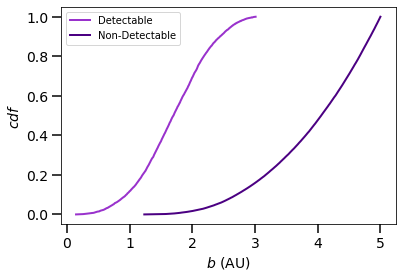

KS: 0.000
AD: 0.001


<ipython-input-18-078994da3489>:9: UserWarning: p-value floored: true value smaller than 0.001
  print('AD: %.3f' %stats.anderson_ksamp([det_orbits[key], \


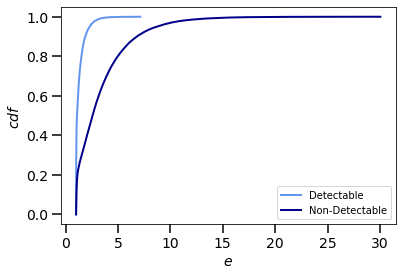

In [18]:
from scipy import stats

def plot_cdf(key, label=None, name=None, color1=None, color2=None, loc=None):
    plt.plot(np.sort(np.squeeze(det_orbits[key])), np.linspace(0, 1, ndet), \
        lw=2, c=color1, label='Detectable')
    plt.plot(np.sort(np.squeeze(orbits[key][det==False])), np.linspace(0, 1, NSAMPLES-ndet), \
        lw=2, c=color2, label='Non-Detectable')
    print('KS: %.3f' %stats.ks_2samp(det_orbits[key], orbits[key][det==False])[1])
    print('AD: %.3f' %stats.anderson_ksamp([det_orbits[key], \
                                           orbits[key][det==False]])[2])
    
    if label is not None:
        plt.xlabel(label)
    plt.ylabel(r'$cdf$')
    plt.legend(loc=loc, fontsize=10)
    
    if name is not None:
        plt.savefig('figures/' + name + '.pdf', bbox_inches='tight', \
                    dpi=250)
    
    plt.show()
    
plot_cdf('b', label=r'$b$ (AU)', name='b_cdf_2samp', color1='darkorchid', \
        color2='indigo', loc='upper left')
plot_cdf('e', label=r'$e$', name='e_cdf_2samp', color1='cornflowerblue', \
        color2='darkblue', loc='lower right')